# Нейроинформатика. Лабораторная работа 7
### Автоассоциативные сети с узким  (Автоэнкодеры)

Целью работы является исследование свойств автоассоциативных сетей с узким горлом, алгоритмов обучения, а также применение сетей для выполнения линейного и нелинейного анализа главных компонент набора данных.

Выполнил Лисин Роман, М8О-406Б-20.

In [2]:
!pip install pyrenn
import pyrenn
import numpy as np
from matplotlib import pyplot as plt

  Preparing metadata (setup.py) ... done
  Created wheel for pyrenn: filename=pyrenn-0.1-py3-none-any.whl size=9239 sha256=83c79ffec9109349a4dbd2663b2412d9167ef2313eb61613f2bdb1d6e36ddcb1
  Stored in directory: /root/.cache/pip/wheels/88/73/cf/52f87ad9ea9e987087f5c2b03c8d33e837693325a2e0305736
Successfully built pyrenn


Зададим обучающее множество - эллипс.

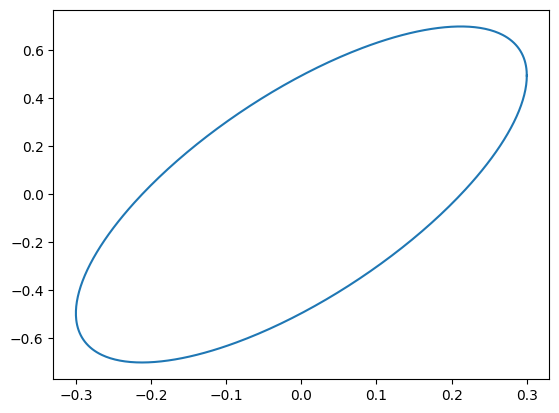

In [3]:
t = np.linspace(0, 2 * np.pi, 500, endpoint=True)
x = 0.3 * np.cos(t)
y = 0.7 * np.sin(t + np.pi / 4)

data = np.array([x, y])
plt.plot(data[0],data[1])
plt.show()

Определим автоассоциативную сеть с узким горлом.

In [3]:
nn = pyrenn.CreateNN([2, 1, 2])
nn = pyrenn.train_LM(data, data, nn, k_max=100)
print('MSE: {}'.format(nn['ErrorHistory'][-1]))

Maximum number of iterations reached
MSE: 10.221761107305213


Выделим главную ось эллипса.

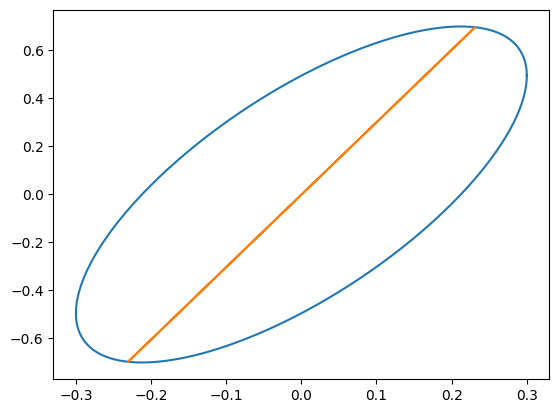

In [4]:
pred = pyrenn.NNOut(data, nn)
plt.plot(data[0],data[1])
plt.plot(pred[0],pred[1])
plt.show()

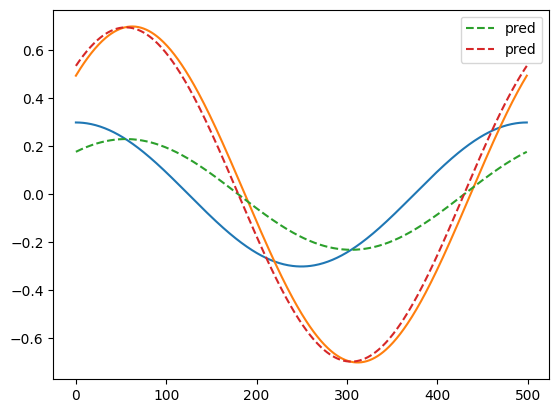

In [5]:
plt.plot(data.T, '-')
plt.plot(pred.T, '--', label="pred")
plt.legend()
plt.show()

Предсказанная ось примерно совпадает с реальной.

Теперь попробуем аппроксимировать нелинейную кривую. Искусственно увеличим размерность пространства, чтобы получить вменяемый результат.

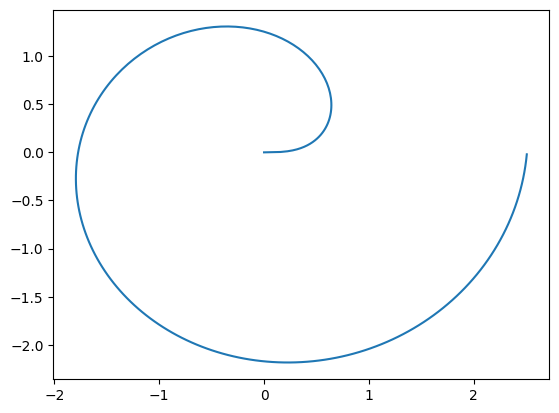

In [54]:
phi = np.arange(0, 2 * np.pi, 0.025)
r = np.sqrt(phi)
x = r*np.cos(phi)
y = r*np.sin(phi)
data = np.array([x, y, [0] * len(x), [0] * len(y)])
plt.plot(data[0], data[1])
plt.show()

In [55]:
nn2 = pyrenn.CreateNN([4, 3, 2, 1, 2, 3, 4])
nn2 = pyrenn.train_LM(data, data, nn2, k_max=100)
print('MSE: {}'.format(nn2['ErrorHistory'][-1]))

Maximum number of iterations reached
MSE: 6.836210259195709


In [56]:
pred = pyrenn.NNOut(data, nn2)

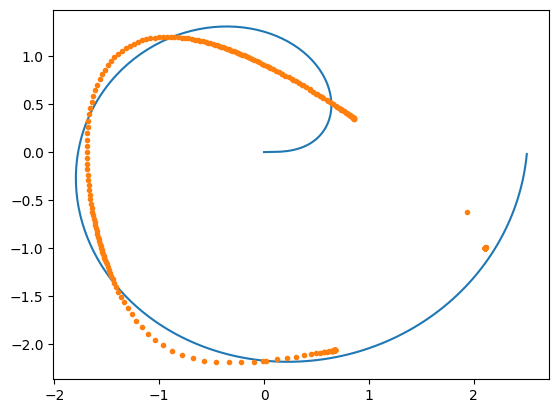

In [57]:
plt.plot(x,y)
plt.plot(pred[0], pred[1], '.')
plt.show()

Результат близок к действительности.

Теперь аппроксимируем пространственную кривую.

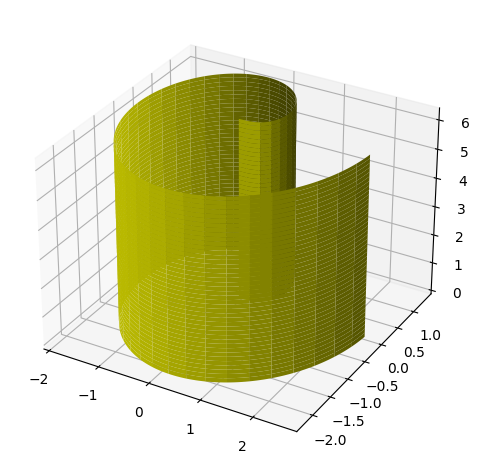

In [33]:
z = phi
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z.reshape(-1,1), color='y')
fig.tight_layout()

In [43]:
nn3 = pyrenn.CreateNN([3, 2, 1, 2, 3])
nn3 = pyrenn.train_LM(np.array([x, y, z]), np.array([x, y, z]), nn3, k_max=100)
print('MSE: {}'.format(nn3['ErrorHistory'][-1]))

Maximum number of iterations reached
MSE: 17.25485387526574


In [49]:
pred = pyrenn.NNOut(np.array([x, y, z]), nn3)

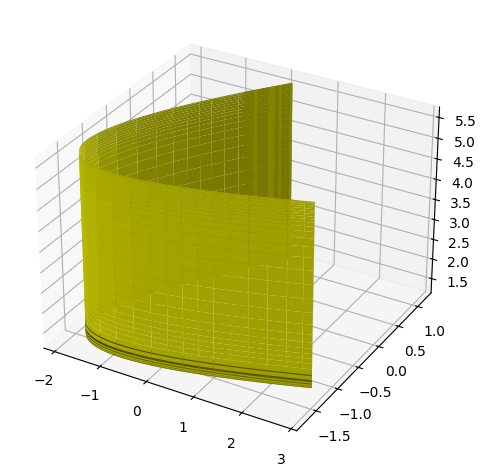

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(pred[0], pred[1], pred[2].reshape(-1,1), color='y')
fig.tight_layout()

### Вывод

В данной лабораторной работе я изучил и реализовал автоэнкодеры для аппроксимации кривых различных степеней. Результаты получились достаточно правдоподобные.